# Semiconductor dopant screening

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WMD-group/SMACT/blob/develop/examples/Dopant_Prediction/doper_example.ipynb)

## Application to titanium dioxide

In [8]:
# Imports for colab
try:
    import google.colab

    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !pip install git+https://github.com/WMD-group/SMACT.git@develop --quiet

In [9]:
from smact.dopant_prediction.doper import Doper

The Doper module includes `get_dopants` function. These require an input (tuple(str)), which is formed by the ionic species of the material.

By default, the top five p-type and n-type candidates are reported. Use `num_dopants` input to modify the number of outputs.

The output format:

(dict): Dopant suggestions, given as a dictionary with keys "n_type_cation", "p_type_cation", "n_type_anion", "p_type_anion".

Each key contains a list of possible dopants in the order of probability (Highest --> Lowest).

Each possible dopant is represented with tuple: ('substituted dopant', 'original specie', 'probability') 

In [10]:
material = Doper(("Ti4+", "O2-"))

# 5 possible dopants
material.get_dopants(5)

{'n-type cation substitutions': {'sorted': [['Ta5+',
    'Ti4+',
    8.790371775858281e-05,
    1.0],
   ['Nb5+', 'Ti4+', 7.830035204694342e-05, 1.0],
   ['Sb5+', 'Ti4+', 6.259166355036722e-05, 1.0],
   ['Ru5+', 'Ti4+', 4.904126561555437e-05, 1.0],
   ['Re5+', 'Ti4+', 4.546178573532138e-05, 1.0]],
  '5': [['Ta5+', 'Ti4+', 8.790371775858281e-05, 1.0],
   ['Nb5+', 'Ti4+', 7.830035204694342e-05, 1.0],
   ['Sb5+', 'Ti4+', 6.259166355036722e-05, 1.0],
   ['Ru5+', 'Ti4+', 4.904126561555437e-05, 1.0],
   ['Re5+', 'Ti4+', 4.546178573532138e-05, 1.0]],
  '6': [['W6+', 'Ti4+', 3.4638026110457894e-05, 1.0],
   ['Mo6+', 'Ti4+', 1.6924395455176864e-05, 1.0],
   ['Te6+', 'Ti4+', 1.4299724897106019e-05, 1.0],
   ['U6+', 'Ti4+', 1.4299724897106019e-05, 1.0],
   ['Ir6+', 'Ti4+', 4.061295856299769e-06, 1.0]]},
 'p-type cation substitutions': {'sorted': [['Na1+',
    'Ti4+',
    0.00010060400812977031,
    1.0],
   ['Zn2+', 'Ti4+', 8.56373996146833e-05, 1.0],
   ['Mn2+', 'Ti4+', 8.563568688381837e-05, 1.

The results can be presented in a table format using the `to_table` attribute.

In [11]:
material.to_table

n-type cation substitutions
sorted
+--------+----------+--------+---------------+---------------+
|   Rank | Dopant   | Host   |   Probability |   Selectivity |
+========+==========+========+===============+===============+
|      1 | Ta5+     | Ti4+   |   8.79037e-05 |             1 |
+--------+----------+--------+---------------+---------------+
|      2 | Nb5+     | Ti4+   |   7.83004e-05 |             1 |
+--------+----------+--------+---------------+---------------+
|      3 | Sb5+     | Ti4+   |   6.25917e-05 |             1 |
+--------+----------+--------+---------------+---------------+
|      4 | Ru5+     | Ti4+   |   4.90413e-05 |             1 |
+--------+----------+--------+---------------+---------------+
|      5 | Re5+     | Ti4+   |   4.54618e-05 |             1 |
+--------+----------+--------+---------------+---------------+

5+
+--------+----------+--------+---------------+---------------+
|   Rank | Dopant   | Host   |   Probability |   Selectivity |
+========+======

Ternary and multicomponent systems can also be tested.

In [12]:
quaternary = Doper(("Cu1+", "Zn2+", "Ge4+", "S2-"))
quaternary.get_dopants()

{'n-type cation substitutions': {'sorted': [['Si4+',
    'Zn2+',
    0.0002388228584563032,
    0.21],
   ['Zn2+', 'Cu1+', 0.00021454984717151132, 0.14],
   ['Hg2+', 'Cu1+', 0.00020520758963053147, 0.55],
   ['Ge4+', 'Zn2+', 0.0001751936790055855, 0.1],
   ['P5+', 'Ge4+', 0.0001357428244856664, 0.69]],
  '2': [['Zn2+', 'Cu1+', 0.00021454984717151132, 0.14],
   ['Hg2+', 'Cu1+', 0.00020520758963053147, 0.55],
   ['Cu2+', 'Cu1+', 9.006774407383325e-05, 0.2],
   ['Mn2+', 'Cu1+', 3.960170207846625e-05, 0.09],
   ['Fe2+', 'Cu1+', 3.333914056567426e-05, 0.1]],
  '3': [['Y3+', 'Zn2+', 0.00010200196717382551, 0.95],
   ['Fe3+', 'Zn2+', 7.56685107087228e-05, 0.66],
   ['In3+', 'Cu1+', 5.763684879119039e-05, 0.51],
   ['Cr3+', 'Zn2+', 5.312098771970144e-05, 0.76],
   ['Al3+', 'Zn2+', 5.105799273313971e-05, 0.37]],
  '4': [['Si4+', 'Zn2+', 0.0002388228584563032, 0.21],
   ['Ge4+', 'Zn2+', 0.0001751936790055855, 0.1],
   ['Ti4+', 'Zn2+', 8.56373996146833e-05, 0.54],
   ['Sn4+', 'Zn2+', 5.1051866141

If you want to plot the results in the form of heatmap, use `plot_dopants` method.

Default color scheme of the heatmap is 'YlOrRd'. Refer to the matplotlib documentation for other options using "cmap" parameter

You're using a deprecated version of periodic_table_heatmap(). Consider `pip install pymatviz` which offers an interactive plotly periodic table heatmap. You can keep calling this same function from pymatgen. Some of the arguments have changed which you'll be warned about. To disable this warning, pass pymatviz=False.
You're using a deprecated version of periodic_table_heatmap(). Consider `pip install pymatviz` which offers an interactive plotly periodic table heatmap. You can keep calling this same function from pymatgen. Some of the arguments have changed which you'll be warned about. To disable this warning, pass pymatviz=False.
You're using a deprecated version of periodic_table_heatmap(). Consider `pip install pymatviz` which offers an interactive plotly periodic table heatmap. You can keep calling this same function from pymatgen. Some of the arguments have changed which you'll be warned about. To disable this warning, pass pymatviz=False.
You're using a deprecated version of per

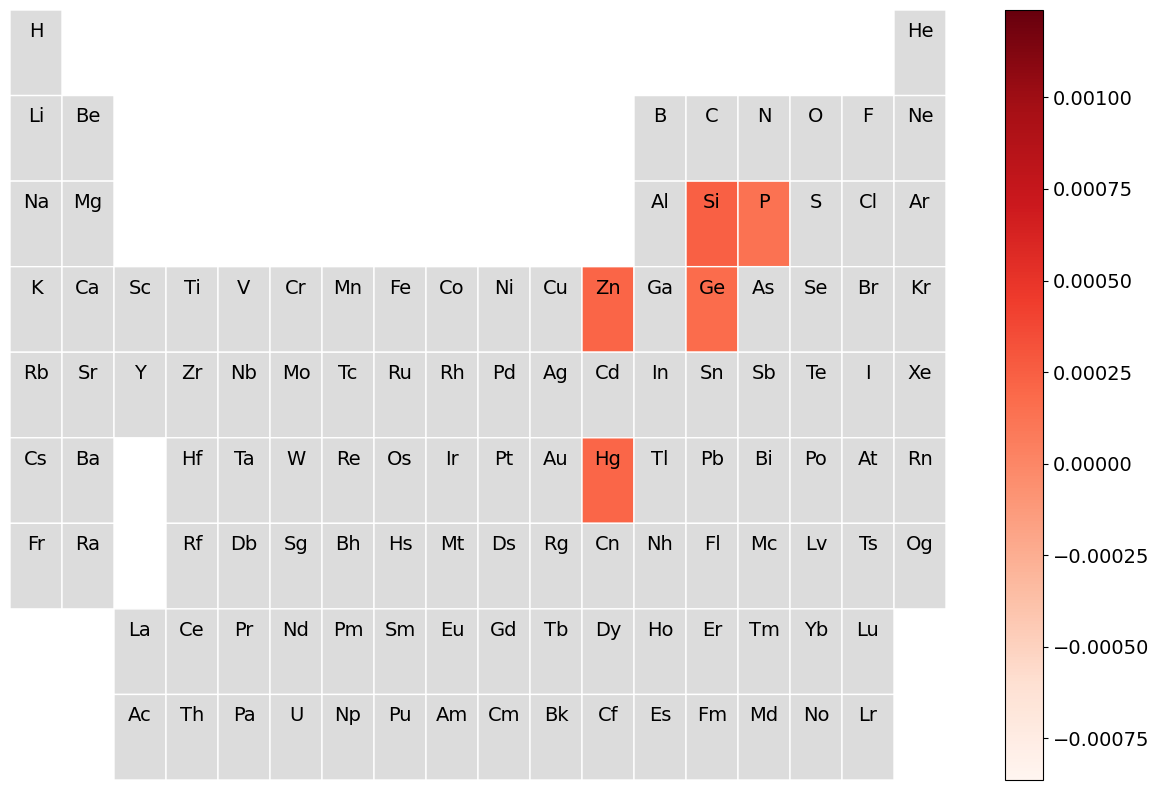

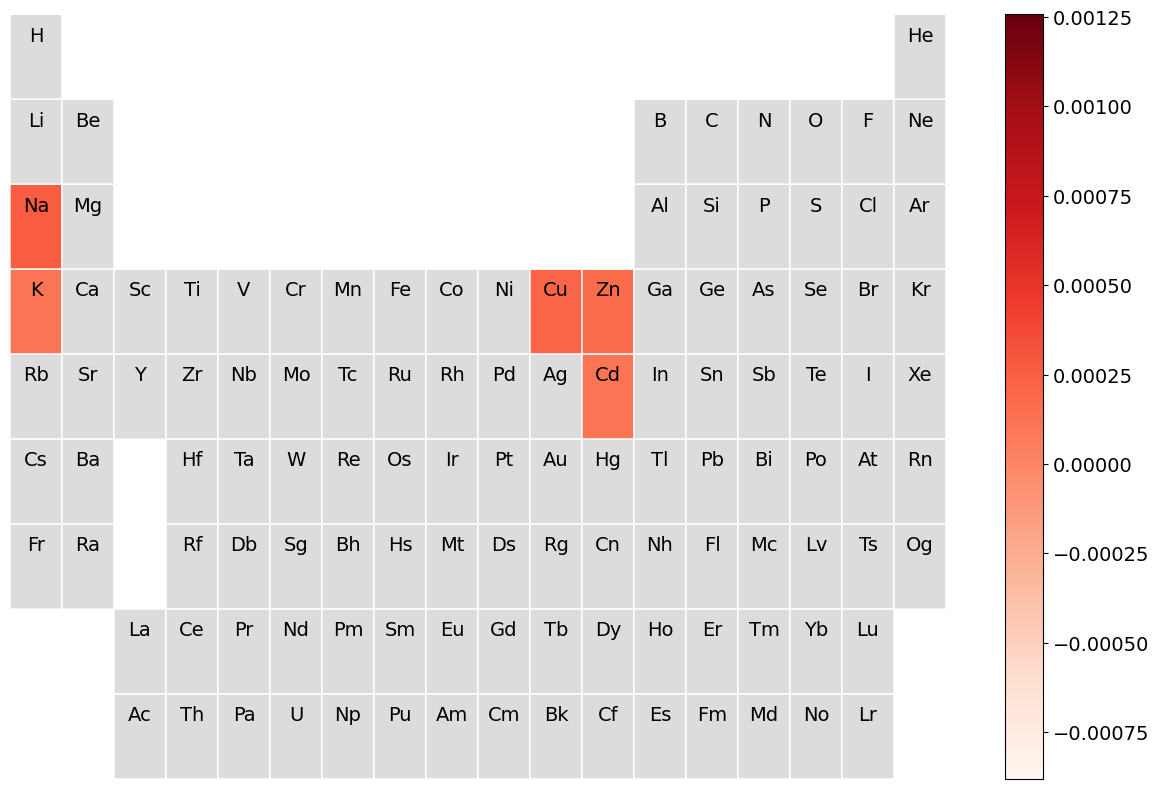

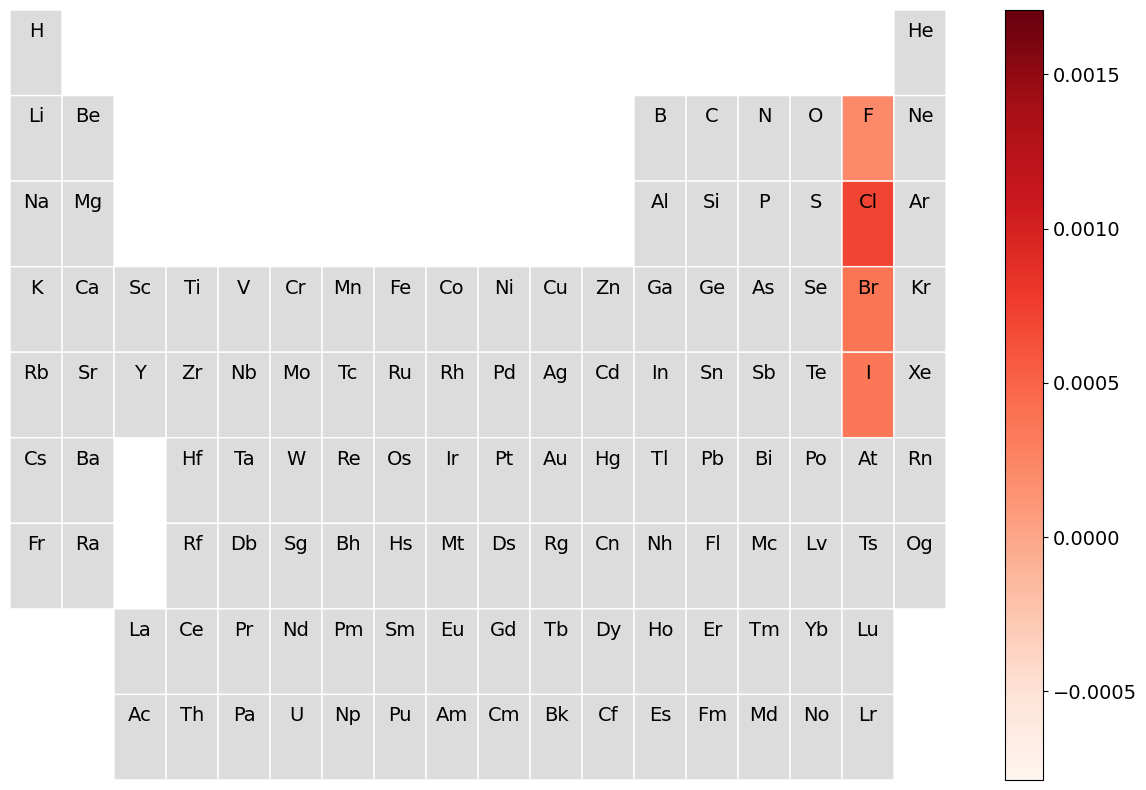

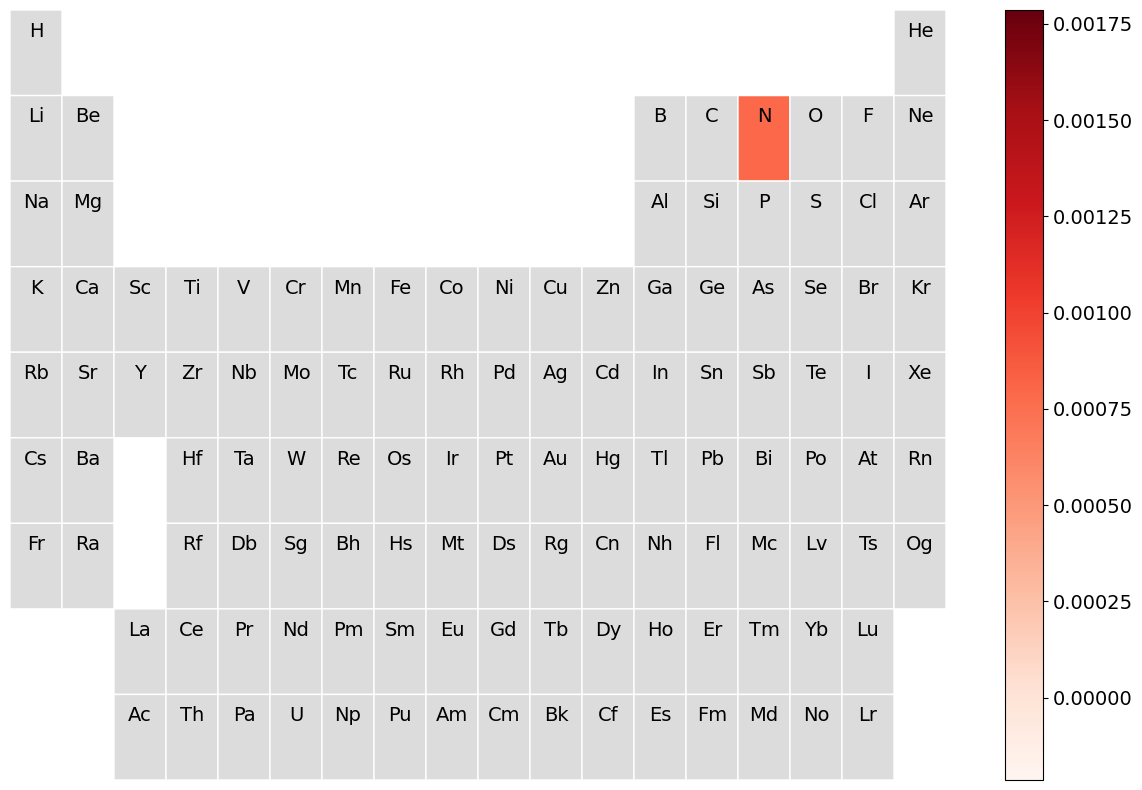

In [13]:
quaternary.plot_dopants(cmap="Reds")

## Alternative metrics

The probability values for the dopants are calculated based on the algorithm presented in:
        [Hautier, G., Fischer, C., Ehrlacher, V., Jain, A., and Ceder, G. (2011)
        Data Mined Ionic Substitutions for the Discovery of New Compounds.
        Inorganic Chemistry, 50(2), 656-663](https://pubs.acs.org/doi/10.1021/ic102031h)
        
In SMACT, we can also provide alternative ways for determing the possible dopants based on alternative probability or similarity metrics.

For example, we have a similarity metric based on distributed representations of the ions, which we call `skipspecies`. This metric is based on the idea that similar ions should have similar embeddings. The similarity is calculated based on the cosine similarity of the embeddings of the ions.

In [ ]:
doper_skipspecies = Doper(
    ("Ti4+", "O2-"), embedding="skipspecies", use_probability=False
)
doper_skipspecies.get_dopants(5)
# Present results in a table
doper_skipspecies.to_table